In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

((500,), (500,))


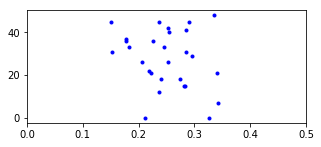

In [31]:
t = 0.5

n = 50
k = 30
t_stim = 0.15
dt = 1e-4
w = .2
rate = 3
# ns, ts = util.k_spikes(t_stim, n, k, w, a0=a, a_step=.5, max_iterations=700, dt=dt, seed=None)
times = fsutil.create_times(t, dt)
ns, ts = util.poisson_impulse(t, t_stim, w, rate, n, dt=1e-3, seed=None)
plt.figure(figsize=(5, 12))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.xlim(0, t)

times = fsutil.create_times(t, dt)

Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 1s


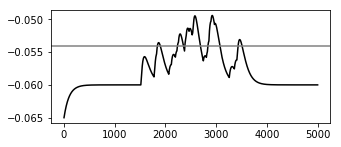

In [32]:
w_in = 1.5e-9
vm = neurons.shadow_voltage(t, ns, ts, w_in=w_in, tau_c=5e-3)

plt.figure(figsize=(5, 12))
plt.subplot(511)
plt.plot(range(len(vm)), vm, 'k')
plt.axhline(-54e-3, color='grey')

Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 1s


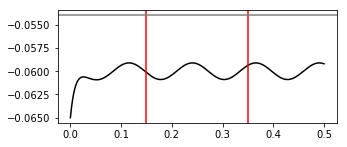

In [34]:
f = 8 # 50
A = 1e-3
phi = 0.05
vm = neurons.shadow_voltage(t, ns, ts, 5e-3, w_in=0, f=f, A=A, phi=phi)

plt.figure(figsize=(5, 12))
plt.subplot(511)
plt.plot(times, vm, 'k')
plt.axvline(t_stim, color='red')
plt.axvline(t_stim+w, color='red')
plt.axhline(-54e-3, color='grey')

Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 1s


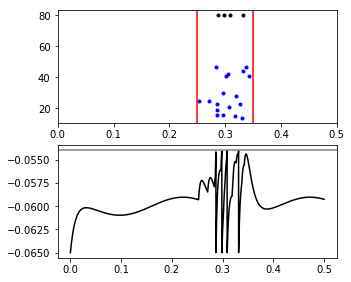

In [21]:
ns_e, ts_e, vs_e = neurons.lif(t, 1,
                             ns, ts, 
                             w_in=w_in,
                             f=f, 
                             A=A,
                             phi=0.1,
                             r_b=r_b,
                             time_step=dt)

plt.figure(figsize=(5, 12))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e+n + k, '.k')
plt.axvline(t_stim, color='red')
plt.axvline(t_stim+w, color='red')
plt.xlim(0, t)

plt.subplot(512)
vm = vs_e['vm'].flatten()
plt.plot(times, vm, 'k')
plt.axhline(-54e-3, color='grey')